In [2]:
import yfinance as yf
import pandas as pd
import datetime
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

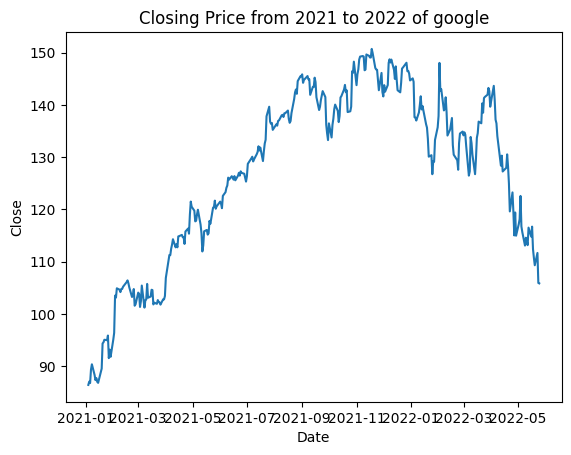

In [3]:
start_time = datetime.datetime(2021, 1, 1)
end_time = datetime.datetime(2022, 5, 26)

google = yf.Ticker("GOOG")
df = google.history(start=start_time, end=end_time)

plt.title('Closing Price from 2021 to 2022 of google')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.show()


In [4]:
data = df.filter(items=['Close'])
# Convert all values into a numpy array
dataframe = data.values
training_data_len = math.ceil(len(dataframe)*0.9)
training_data_len


317

In [5]:
# Scaler model
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(dataframe)

# Scaling the array to convert values to be between 0 and 1
scaled_data = scaler.transform(dataframe)

In [6]:
# Training data set
train_data = scaled_data[0:training_data_len, :]

# Splitting the data into x_train and y_train
x_train = []
y_train = []
for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.00986041, 0.00548239, 0.04588862, 0.06141024,
       0.02992357, 0.01423856, 0.02034308, 0.00928504, 0.00618223,
       0.04869585, 0.12338055, 0.12676327, 0.13438412, 0.13310106,
       0.14697416, 0.07974703, 0.10488048, 0.08359644, 0.1346174 ,
       0.1549606 , 0.26582111, 0.25983324, 0.28754063, 0.28358241,
       0.27627257, 0.28550314, 0.28589982, 0.29229196, 0.30612625,
       0.31111086, 0.30247133, 0.28998239, 0.26178518, 0.26643541,
       0.28533987, 0.2357186 , 0.23999565, 0.27471731, 0.27030807,
       0.2321026 , 0.24950614, 0.29573697, 0.23012741, 0.25231349,
       0.25412541, 0.30058169, 0.25948332, 0.26303714, 0.28327912,
       0.28215934, 0.23949788, 0.24492592, 0.24134089, 0.25251568,
       0.24637225, 0.24582796, 0.23897685, 0.2548408 , 0.25452196])]
[0.2647013314449205]

[array([0.        , 0.00986041, 0.00548239, 0.04588862, 0.06141024,
       0.02992357, 0.01423856, 0.02034308, 0.00928504, 0.00618223,
       0.04869585, 0.12338055, 0.126

In [7]:
# Converting training datasets to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [8]:
# Reshaping the data set to be 3D
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(257, 60, 1)

In [9]:
# LSTM Model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [10]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
257/257 [==============================] - 12s 32ms/step - loss: 0.0103
Epoch 2/10
257/257 [==============================] - 9s 34ms/step - loss: 0.0055
Epoch 3/10
257/257 [==============================] - 7s 28ms/step - loss: 0.0051
Epoch 4/10
257/257 [==============================] - 9s 34ms/step - loss: 0.0044
Epoch 5/10
257/257 [==============================] - 10s 37ms/step - loss: 0.0028
Epoch 6/10
257/257 [==============================] - 8s 31ms/step - loss: 0.0033
Epoch 7/10
257/257 [==============================] - 9s 34ms/step - loss: 0.0026
Epoch 8/10
257/257 [==============================] - 7s 28ms/step - loss: 0.0023
Epoch 9/10
257/257 [==============================] - 9s 34ms/step - loss: 0.0024
Epoch 10/10
257/257 [==============================] - 7s 28ms/step - loss: 0.0021


In [11]:
# Testing data set
test_data = scaled_data[training_data_len - 60: ,:]
x_test = []
y_test = dataframe[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])



In [12]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [13]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 20ms/step


In [14]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)

<ipython-input-15-2329fc46a278>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


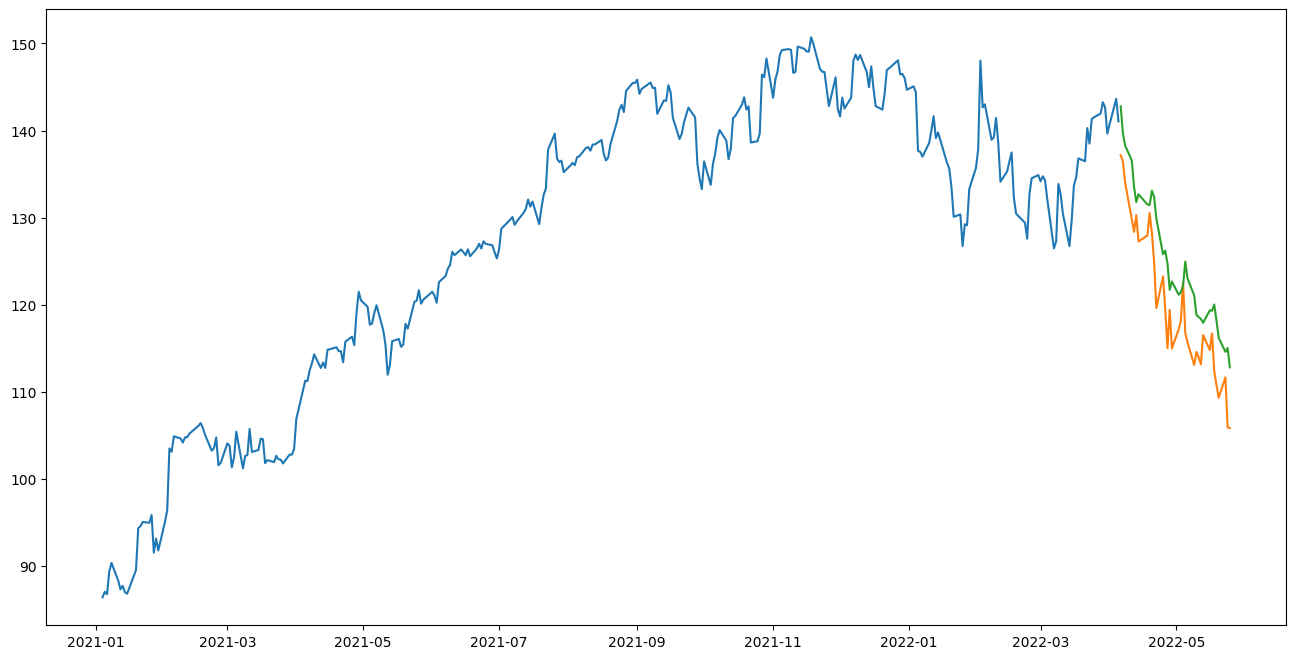

In [15]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.show()

In [16]:
last_100_days = data[-100:].values
scaled_date = scaler.transform(last_100_days)
X_test = []
X_test.append(scaled_data)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

x = model.predict(X_test)
y = scaler.inverse_transform(x)
print(y)


1/1 [==============================] - 1s 1s/step
[[111.44168]]


In [17]:
# Last 100 days
fut_inp = scaled_data[252:]
fut_inp = fut_inp.reshape(1,-1)
tmp_inp = list(fut_inp)
tmp_inp = tmp_inp[0]
tmp_inp = tmp_inp.tolist()
print(tmp_inp)
print(tmp_inp)
fut_inp.shape

[0.9123675057573173, 0.9021339096029968, 0.7969501405867623, 0.795355843036446, 0.7868563243159092, 0.8112665433882456, 0.8337169962845603, 0.8590757725627041, 0.8199293364039024, 0.8301242498400481, 0.7757515363921319, 0.765820994416399, 0.7324525223030787, 0.6793473204979488, 0.6837020927587851, 0.6271442803685443, 0.6660964723259564, 0.6642456347857786, 0.7290776331302531, 0.7665443375145478, 0.8004493840192437, 0.9584350633447307, 0.8746675184775243, 0.8803522168282638, 0.8169277473273329, 0.8212046795172399, 0.8560430949212201, 0.8117096147675904, 0.7421497813833129, 0.7603465591840843, 0.7778513197689099, 0.7943683657951743, 0.7138202672762242, 0.6851874616732576, 0.6686236641409777, 0.6403564458223614, 0.7194968968391235, 0.748207542513019, 0.7539855065585004, 0.7427407014339662, 0.7518157145813438, 0.7449180875643842, 0.710919538047657, 0.622929525308465, 0.635589572088449, 0.7380437176417878, 0.7196293198866195, 0.6853118159329135, 0.6272298332513797, 0.6726364621877619, 0.735

(1, 100)

In [18]:

lst_output=[]
n_steps=100
i=0
while(i<100):

    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[[0.3892822563648224], [0.42054733633995056], [0.45813900232315063], [0.4949016273021698], [0.5286257266998291], [0.55842524766922], [0.5840566158294678], [0.6057190895080566], [0.6239111423492432], [0.6392974853515625], [0.652592122554779], [0.6644683480262756], [0.6755010485649109], [0.6861366629600525], [0.6966893076896667], [0.7073518633842468], [0.7182174324989319], [0.7293038964271545], [0.7405779361724854], [0.7519761323928833], [0.7634228467941284], [0.77484130859375], [0.7861625552177429], [0.7973300814628601], [0.8083009719848633], [0.8190456032752991], [0.8295461535453796], [0.8397939801216125], [0.8497865796089172], [0.8595262765884399], [0.8690173029899597], [0.8782649636268616], [0.887273907661438], [0.8960487842559814], [0.9045925140380859], [0.9129075407981873], [0.9209959506988525], [0.9288589954376221], [0.9364979267120361], [0.9439144134521484], [0.9511096477508545], [0.9580863118171692], [0.9648469090461731], [0.971394419670105], [0.9777323007583618], [0.98386442661

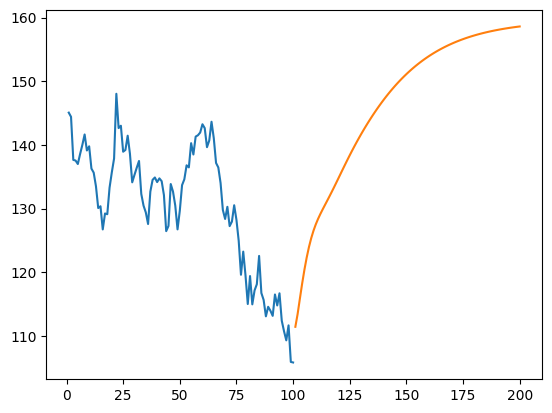

In [19]:
plot_new = np.arange(1, 101)
plot_pred = np.arange(101, 201)
plt.plot(plot_new, scaler.inverse_transform(scaled_data[252:]))
plt.plot(plot_pred, scaler.inverse_transform(lst_output))

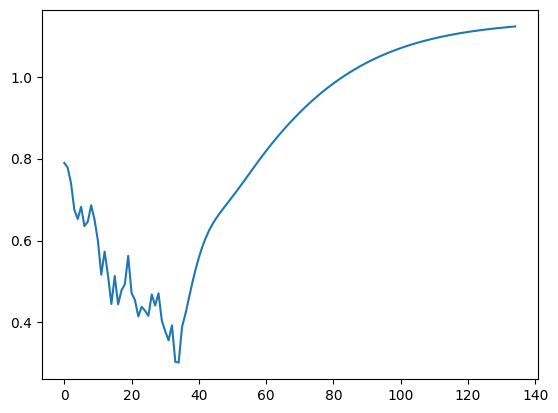

In [20]:
ds_new = scaled_data.tolist()
ds_new.extend(lst_output)
plt.plot(ds_new[317:])

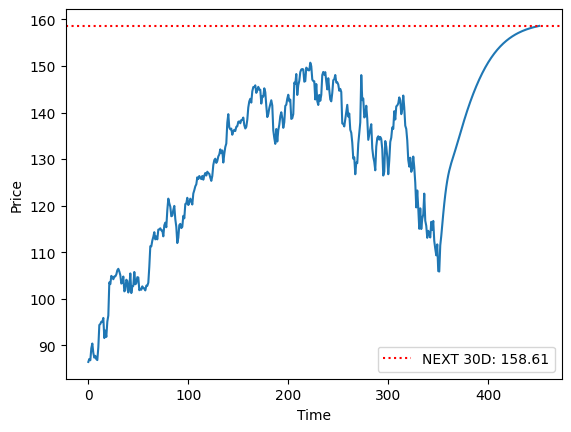

In [22]:
final_graph = scaler.inverse_transform(ds_new).tolist()
plt.plot(final_graph,)
plt.ylabel("Price")
plt.xlabel("Time")
plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
plt.legend()